## Explore results from runs that have Kv maps parametrized by Kv and epsilon

Compare Tr upwelled, HCW, N^2 and Tr concetration profiles.

In [1]:
import cmocean as cmo
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import matplotlib.gridspec as gspec
import numpy as np
import seaborn as sns
import scipy.stats
import pandas as pd

import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

import os
import sys
import warnings
warnings.filterwarnings("ignore")

/home/kramosmu/anaconda3/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
grid_file1 = '/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/run01/gridGlob.nc'
state_file2 = '/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/run01/stateGlob.nc'

with Dataset(grid_file1, 'r') as nbl:
    Z1 = nbl.variables['RC'][:]
    hfac = nbl.variables['HFacC'][:,:,:]
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
with Dataset(state_file2,'r') as stfl:
    time = stfl.variables['T'][:]

mask = rout.getMask(grid_file1,'HFacC')    
nx = 616
ny = 360
nz = 90

In [10]:
class run:
        pass
    
CNTDIFF_run38 = run()
#VISC3D_run06 = run()
#VISC3D_run05 = run()
#VISC3D_run03 = run()
VISC3D_REALISTIC_run24 = run()
VISC3D_REALISTIC_run27 = run()
VISC3D_REALISTIC_run07 = run()
VISC3D_REALISTIC_run11 = run()
VISC3D_REALISTIC_run08 = run()
VISC3D_REALISTIC_run09 = run()
VISC3D_REALISTIC_run12 = run()
VISC3D_REALISTIC_run10 = run()
VISC3D_REALISTIC_run13 = run()
VISC3D_REALISTIC_run23 = run()
VISC3D_REALISTIC_run17 = run()
VISC3D_REALISTIC_run21 = run()
VISC3D_REALISTIC_run22 = run()
VISC3D_REALISTIC_run25 = run()
VISC3D_REALISTIC_run16 = run()
VISC3D_REALISTIC_run19 = run()
VISC3D_REALISTIC_run20 = run()
VISC3D_REALISTIC_run26 = run()

records = [ CNTDIFF_run38, 
            #VISC3D_run06, 
            #VISC3D_run05, 
            #VISC3D_run03, 
            VISC3D_REALISTIC_run24, # epsilon 5,   kv 1.2E-2
            VISC3D_REALISTIC_run27, # epsilon 5,   kv 1E-2
            VISC3D_REALISTIC_run07, # epsilon 10,   kv 1E-2
            VISC3D_REALISTIC_run11, # epsilon 15,   kv 1E-2
            VISC3D_REALISTIC_run08, # epsilon 25,   kv 1E-2
            VISC3D_REALISTIC_run09, # epsilon 50,   kv 1E-2
            VISC3D_REALISTIC_run12, # epsilon 75,   kv 1E-2
            VISC3D_REALISTIC_run10, # epsilon 100,   kv 1E-2
            VISC3D_REALISTIC_run13, # epsilon 150,   kv 1E-2
            VISC3D_REALISTIC_run23, # epsilon 5,   kv 8E-3
            VISC3D_REALISTIC_run17, # epsilon 5,   kv 5E-3
            VISC3D_REALISTIC_run21, # epsilon 25,   kv 5E-3
            VISC3D_REALISTIC_run22, # epsilon 100,   kv 5E-3
            VISC3D_REALISTIC_run25, # epsilon 5,   kv 2.5E-3
            VISC3D_REALISTIC_run16, # epsilon 5,   kv 1E-3
            VISC3D_REALISTIC_run19, # epsilon 25,   kv 1E-3
            VISC3D_REALISTIC_run20, # epsilon 100,   kv 1E-3
            VISC3D_REALISTIC_run26, # epsilon 5,   kv 5E-4
          ]

records_step = [ CNTDIFF_run38, 
            #VISC3D_run06, 
            #VISC3D_run05, 
            #VISC3D_run03, 
            VISC3D_REALISTIC_run24, # epsilon 5,   kv 1.2E-2
            VISC3D_REALISTIC_run27, # epsilon 5,   kv 1E-2
            VISC3D_REALISTIC_run23, # epsilon 5,   kv 8E-3
            VISC3D_REALISTIC_run17, # epsilon 5,   kv 5E-3
            VISC3D_REALISTIC_run25, # epsilon 5,   kv 2.5E-3
            VISC3D_REALISTIC_run16, # epsilon 5,   kv 1E-3
            VISC3D_REALISTIC_run26, # epsilon 5,   kv 5E-4
          ]

records_nobase =   [#VISC3D_run06, 
                    #VISC3D_run05, 
                    #VISC3D_run03, 
                    VISC3D_REALISTIC_run24, # epsilon 5,   kv 1.2E-2
                    VISC3D_REALISTIC_run27, # epsilon 5,   kv 1E-2
                    VISC3D_REALISTIC_run07, # epsilon 10,   kv 1E-2
                    VISC3D_REALISTIC_run11, # epsilon 15,   kv 1E-2
                    VISC3D_REALISTIC_run08, # epsilon 25,   kv 1E-2
                    VISC3D_REALISTIC_run09, # epsilon 50,   kv 1E-2
                    VISC3D_REALISTIC_run12, # epsilon 75,   kv 1E-2
                    VISC3D_REALISTIC_run10, # epsilon 100,   kv 1E-2
                    VISC3D_REALISTIC_run13, # epsilon 150,   kv 1E-2
                    VISC3D_REALISTIC_run23, # epsilon 5,   kv 8E-3
                    VISC3D_REALISTIC_run17, # epsilon 5,   kv 5E-3
                    VISC3D_REALISTIC_run21, # epsilon 25,   kv 5E-3
                    VISC3D_REALISTIC_run22, # epsilon 100,   kv 5E-3
                    VISC3D_REALISTIC_run25, # epsilon 5,   kv 2.5E-3
                    VISC3D_REALISTIC_run16, # epsilon 5,   kv 1E-3
                    VISC3D_REALISTIC_run19, # epsilon 25,   kv 1E-3
                    VISC3D_REALISTIC_run20, # epsilon 100,   kv 1E-3
                    VISC3D_REALISTIC_run26, # epsilon 5,   kv 5E-4
                    ]

names =    ['CNTDIFF_run38', 
            #'VISC3D_run06', 
            #'VISC3D_run05', 
            #'VISC3D_run03', 
            'VISC3D_REALISTIC_run24', # epsilon 5,   kv 1.2E-2
            'VISC3D_REALISTIC_run27', # epsilon 5,   kv 1E-2
            'VISC3D_REALISTIC_run07', # epsilon 10,   kv 1E-2
            'VISC3D_REALISTIC_run11', # epsilon 15,   kv 1E-2
            'VISC3D_REALISTIC_run08', # epsilon 25,   kv 1E-2
            'VISC3D_REALISTIC_run09', # epsilon 50,   kv 1E-2
            'VISC3D_REALISTIC_run12', # epsilon 75,   kv 1E-2
            'VISC3D_REALISTIC_run10', # epsilon 100,   kv 1E-2
            'VISC3D_REALISTIC_run13', # epsilon 150,   kv 1E-2
            'VISC3D_REALISTIC_run23', # epsilon 5,   kv 8E-3
            'VISC3D_REALISTIC_run17', # epsilon 5,   kv 5E-3
            'VISC3D_REALISTIC_run21', # epsilon 25,   kv 5E-3
            'VISC3D_REALISTIC_run22', # epsilon 100,   kv 5E-3
            'VISC3D_REALISTIC_run25', # epsilon 5,   kv 2.5E-3
            'VISC3D_REALISTIC_run16', # epsilon 5,   kv 1E-3
            'VISC3D_REALISTIC_run19', # epsilon 25,   kv 1E-3
            'VISC3D_REALISTIC_run20', # epsilon 100,   kv 1E-3
            'VISC3D_REALISTIC_run26', # epsilon 5,   kv 5E-4
            ] 

exps = ['CNTDIFF', #'3DVISC', '3DVISC', '3DVISC',
        '3DVISC_REALISTIC', '3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC',
        '3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC',
        '3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC',
        '3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC',
        '3DVISC_REALISTIC','3DVISC_REALISTIC',
       ]

runs= ['run38',# 'run06', 'run05', 'run03',
       'run24', 'run27','run07','run11', 'run08', 'run09',
       'run12', 'run10', 'run13', 'run23', 'run17','run21',
       'run22', 'run25','run16','run19', 'run20', 'run26']

epsilon = [0, 5, 5,10,15,25,50,75,100,150,5,5,25,100,5,5,25,100,5]
labels = [r'base',
          #r'$K_{can}=10^{-2}$ $m^2$s$^{-1}$',
          #r'$K_{can}=5\times10^{-2}$ $m^2$s$^{-1}$',
          #r'$K_{can}=10^{-3}$ $m^2$s$^{-1}$',
          r'$\epsilon=5$, $K_{can}=1.2\times10^{-2}$', 
          r'$\epsilon=5$, $K_{can}=10^{-2}$',
          r'$\epsilon=10$, $K_{can}=10^{-2}$',
          r'$\epsilon=15$, $K_{can}=10^{-2}$',
          r'$\epsilon=25$, $K_{can}=10^{-2}$',
          r'$\epsilon=50$, $K_{can}=10^{-2}$',
          r'$\epsilon=75$, $K_{can}=10^{-2}$',
          r'$\epsilon=100$, $K_{can}=10^{-2}$',
          r'$\epsilon=150$, $K_{can}=10^{-2}$',
          r'$\epsilon=5$, $K_{can}=8\times10^{-3}$',
          r'$\epsilon=5$, $K_{can}=5\times10^{-3}$',
          r'$\epsilon=25$, $K_{can}=5\times10^{-3}$',
          r'$\epsilon=100$, $K_{can}=5\times10^{-3}$',
          r'$\epsilon=5$, $K_{can}=2.5\times 10^{-3}$',
          r'$\epsilon=5$, $K_{can}=10^{-3}$',
          r'$\epsilon=25$, $K_{can}=10^{-3}$',
          r'$\epsilon=100$, $K_{can}=10^{-3}$',
          r'$\epsilon=5$, $K_{can}=5 \times ^{-4}$',
         ]

colors = ['black', #'jungle green','kelly green', 'light green', 
          'purple', 
          'cobalt blue','french blue','dodger blue','dirty blue','teal blue',
          'turquoise blue','bright sky blue','robin egg blue',
          'blue green',
          'green','leaf green', 'light green',
          'yellow',
          'bright orange', 'light orange', 'light peach',
          'scarlet',
          ]

Sizes = [11,#16,16,16,
         13,13,11,11,11,11,
         11,11,11,13,13,11,
         11,13,13,11,11,13]
Markers = ['o',#                                  'd','d','d',
           '*','*','o','o','o','o','o','o','o','*','*','o','o','*','*','o','o','*']
for rec, name, exp, runnum, col, lab, size, marker,eps in zip(records,names,exps,runs,colors,
                                                              labels, Sizes, Markers, epsilon):
    rec.name = name
    rec.exp = exp
    rec.run = runnum
    rec.color = col
    rec.label = lab
    rec.size = size
    rec.mark = marker
    rec.epsilon = eps

### HCW and Tracer upwelled

In [11]:
for ii in range(len(records)):

    file = ('/data/kramosmu/results/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(records[ii].exp,
                                                                                records[ii].exp,
                                                                                records[ii].run))
    print(file)
    dfcan = pd.read_csv(file)
    records[ii].HCW = dfcan['HCW']
    records[ii].TrMass = dfcan['TrMassHCW']
    records[ii].TrMassTot = dfcan['TotTrMass'] 

/data/kramosmu/results/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun38.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun24.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun27.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun07.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun11.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun08.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun09.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun12.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun10.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun13.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass

Text(0.5,1,'Total tracer mass on shelf')

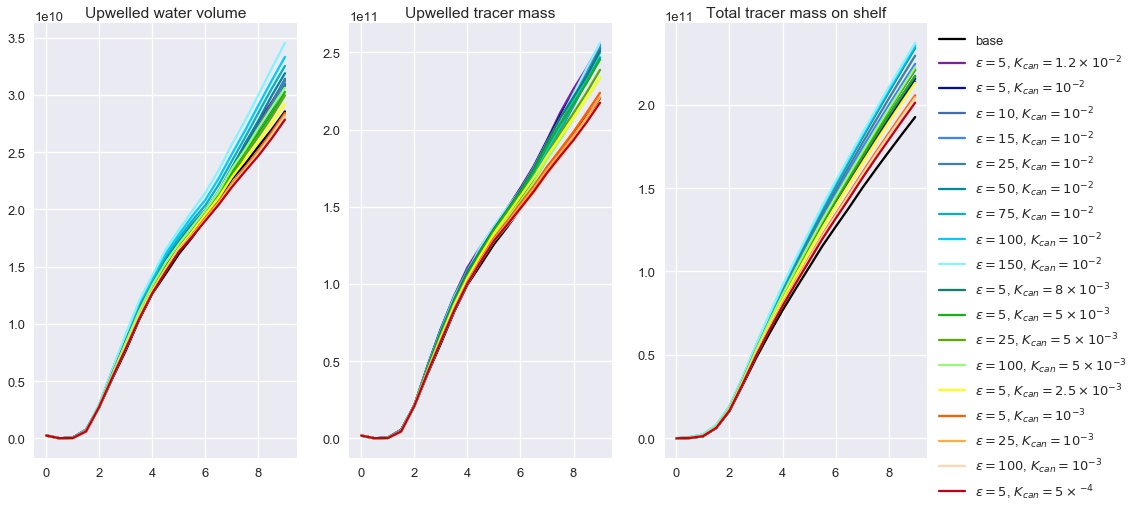

In [12]:
# Canyon cases
sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 3, figsize=(16,8))

for rec in records:
    ax[0].plot(np.arange(19)/2,rec.HCW, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[1].plot(np.arange(19)/2,rec.TrMass, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[2].plot(np.arange(19)/2,rec.TrMassTot-rec.TrMassTot[0], color=sns.xkcd_rgb[rec.color], label=rec.label)
    
    rec.Phi = np.mean(np.array([(rec.HCW[ii]-rec.HCW[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    rec.Phi_std = np.std(np.array([(rec.HCW[ii]-rec.HCW[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    
    rec.PhiTr = np.mean(np.array([(rec.TrMass[ii]-rec.TrMass[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    rec.PhiTr_std = np.std(np.array([(rec.TrMass[ii]-rec.TrMass[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    
ax[2].legend(bbox_to_anchor=(1,1))
ax[0].set_title('Upwelled water volume')
ax[1].set_title('Upwelled tracer mass')
ax[2].set_title('Total tracer mass on shelf')

### Stratification and tracer gradient

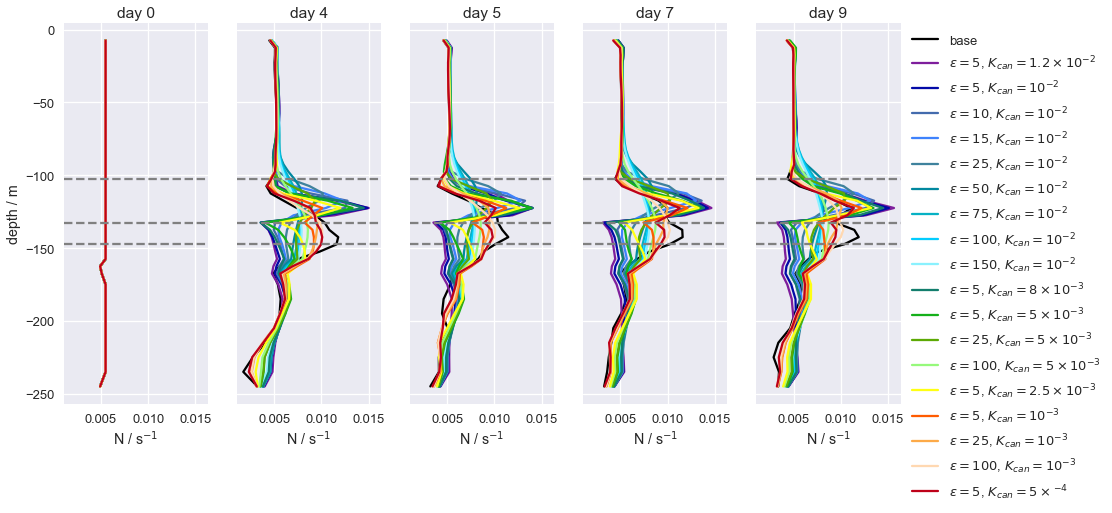

In [77]:
keys = ['N_tt00','N_tt08','N_tt10','N_tt14','N_tt18']
#keys2 = #['N_tt08','N_tt10',
keys2 = ['N_tt16','N_tt18']

days = ['0','4','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records[:]:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    Nab = 0
    Nbe = 0
    Nrim = 0 
    Nmean = 0
    rec.N = df[keys[0]][26]
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],Z1[1:-1], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)
        
    for key,ii in zip(keys2, range(len(keys2))):
        Nab = Nab + np.max(df[keys2[ii]][0:26]) #0:20
        Nbe = Nbe + np.min(df[keys2[ii]][26:29]) #20:24
        Nmean = Nmean + np.mean(df[keys2[ii]][26:29])
        Nrim = Nrim + df[keys2[ii]][26]
    rec.Nab = Nab/  len(keys2)
    rec.Nbe = Nbe/  len(keys2)
    rec.Nrim = Nrim / len(keys2)
    rec.Nmean = Nmean/ len(keys2)    
for ii in range(len(keys)):
    ax[ii].set_xlabel('N / s$^{-1}$')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth
    ax[ii].axhline(Z1[29],color = '0.5', linestyle = '--') # rim depth
    ax[ii].axhline(Z1[20],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    
    


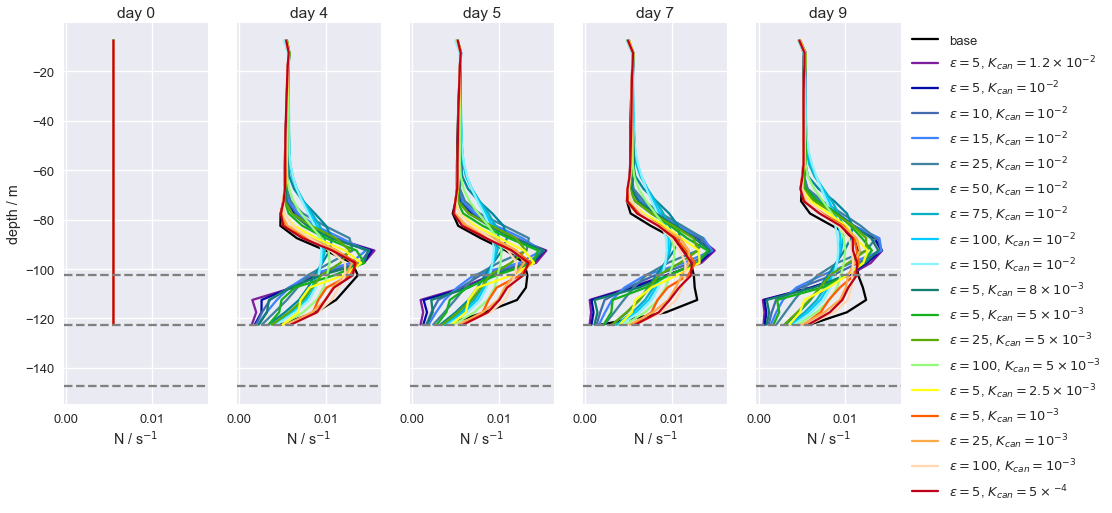

In [84]:
keys = ['N_tt00','N_tt08','N_tt10','N_tt14','N_tt18']
#keys2 = #['N_tt08','N_tt10',
keys2 = ['N_tt16','N_tt18']

days = ['0','4','5','7','9']
sns.set_style('darkgrid')

stname = 'UwH' # Station at downstream head side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records[:]:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    Nab = 0
    Nbe = 0
    Nrim = 0 
    Nmean = 0
    rec.N = df[keys[0]][26]
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],Z1[1:-1], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)
        
    for key,ii in zip(keys2, range(len(keys2))):
        Nab = Nab + np.max(df[keys2[ii]][0:20]) #0:20
        Nbe = Nbe + np.min(df[keys2[ii]][20:24]) #20:24
        Nmean = Nmean + np.mean(df[keys2[ii]][20:24])
        Nrim = Nrim + df[keys2[ii]][24]
    rec.Nab_h = Nab/  len(keys2)
    rec.Nbe_h = Nbe/  len(keys2)
    rec.Nrim_h = Nrim / len(keys2)
    rec.Nmean_h = Nmean/ len(keys2)    
for ii in range(len(keys)):
    ax[ii].set_xlabel('N / s$^{-1}$')
    ax[ii].axhline(Z1[20],color = '0.5', linestyle = '--') # rim depth
    ax[ii].axhline(Z1[24],color = '0.5', linestyle = '--') # rim depth
    ax[ii].axhline(Z1[29],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    
    


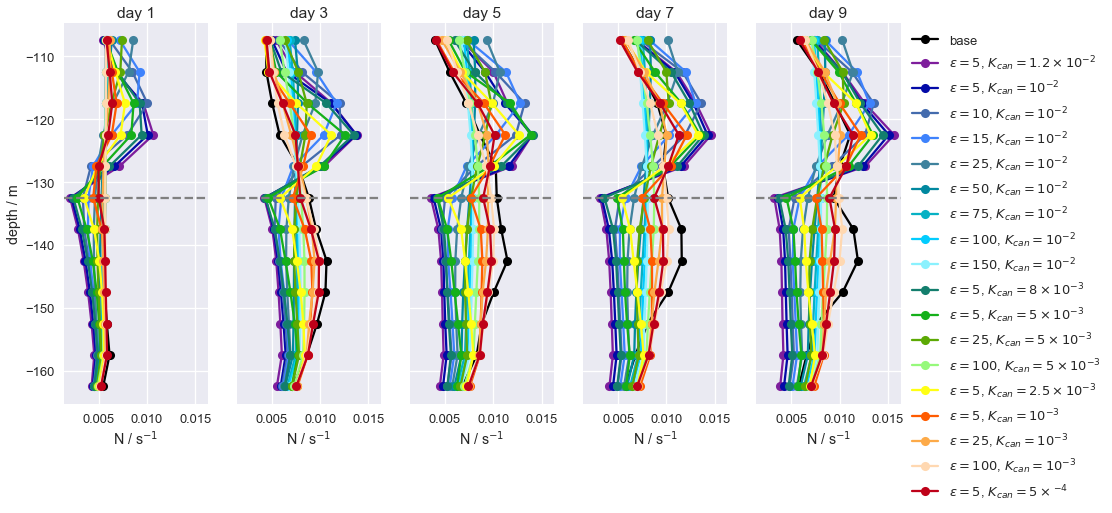

In [85]:
keys = ['N_tt02','N_tt06','N_tt10','N_tt14','N_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][20:32],Z1[21:33],'-o', color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)

        
for ii in range(len(keys)):
    ax[ii].set_xlabel('N / s$^{-1}$')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    
    


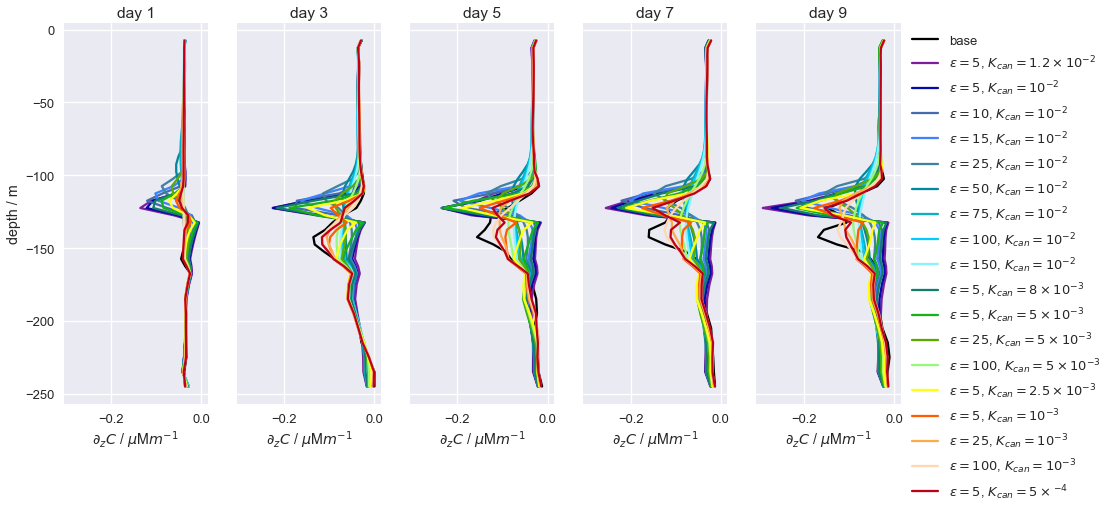

In [67]:
# Tracer gradient

keys = ['dTrdz_tt02','dTrdz_tt06','dTrdz_tt10','dTrdz_tt14','dTrdz_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/dTr1dz_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],Z1[1:-1], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)


for ii in range(len(keys)):
    ax[ii].set_xlabel('$\partial_zC$ / $\mu$M$m^{-1}$')

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    



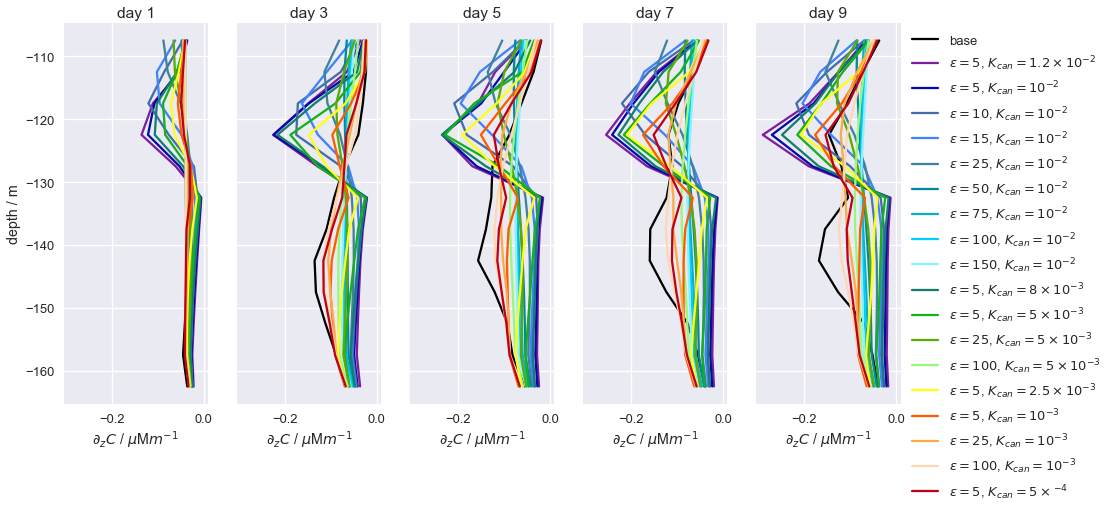

In [68]:
# Tracer gradient

keys = ['dTrdz_tt02','dTrdz_tt06','dTrdz_tt10','dTrdz_tt14','dTrdz_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/dTr1dz_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][20:32],Z1[21:33], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)


for ii in range(len(keys)):
    ax[ii].set_xlabel('$\partial_zC$ / $\mu$M$m^{-1}$')

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    



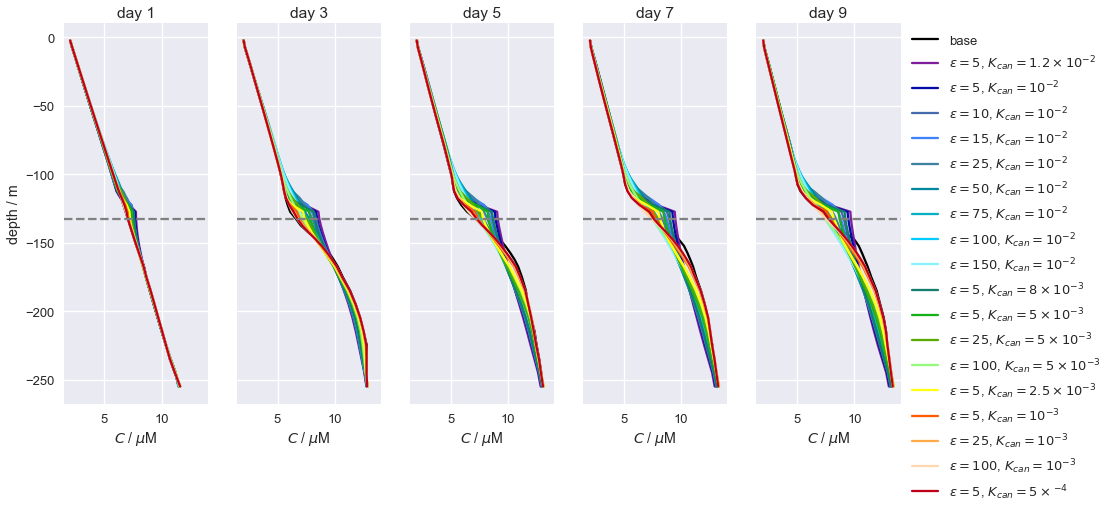

In [69]:
# Tracer profile
sns.set_style('darkgrid')

keys = ['Tr_profile_tt02','Tr_profile_tt06','Tr_profile_tt10','Tr_profile_tt14','Tr_profile_tt18']
days = ['1','3','5','7','9']

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    Crim = 0
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],Z1[:], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)
        Crim = Crim + df[keys[ii]][26]
    rec.Crim = Crim /  len(keys)

for ii in range(len(keys)):
    ax[ii].set_xlabel('$C$ / $\mu$M')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    

#plt.savefig('tracerprofile_comparison_realisticKv.eps', format='eps', frameon=False, bbox='tight')

CNTDIFF_run38 0.0 0.0
VISC3D_REALISTIC_run24 10.2935776836 18.8267117206
VISC3D_REALISTIC_run27 8.12984800183 16.8664908686
VISC3D_REALISTIC_run07 7.96459919932 17.0901813036
VISC3D_REALISTIC_run11 8.15087242962 16.9131425159
VISC3D_REALISTIC_run08 9.40202153129 15.8172863363
VISC3D_REALISTIC_run09 13.2801607043 14.3723239858
VISC3D_REALISTIC_run12 16.9092140024 15.1112451705
VISC3D_REALISTIC_run10 20.4783629072 17.1697435604
VISC3D_REALISTIC_run13 26.3268992614 21.2956997198
VISC3D_REALISTIC_run23 7.77666103313 16.5133520006
VISC3D_REALISTIC_run17 6.91917172334 14.6976760721
VISC3D_REALISTIC_run21 4.85326516774 9.81860519046
VISC3D_REALISTIC_run22 8.26793091479 7.04345479497
VISC3D_REALISTIC_run25 2.05552689303 7.55663041765
VISC3D_REALISTIC_run16 -2.19160090733 0.809345365962
VISC3D_REALISTIC_run19 -3.41802235541 -1.43125588535
VISC3D_REALISTIC_run20 -4.52306006086 -4.32540240162
VISC3D_REALISTIC_run26 -5.6271512992 -3.89832989696


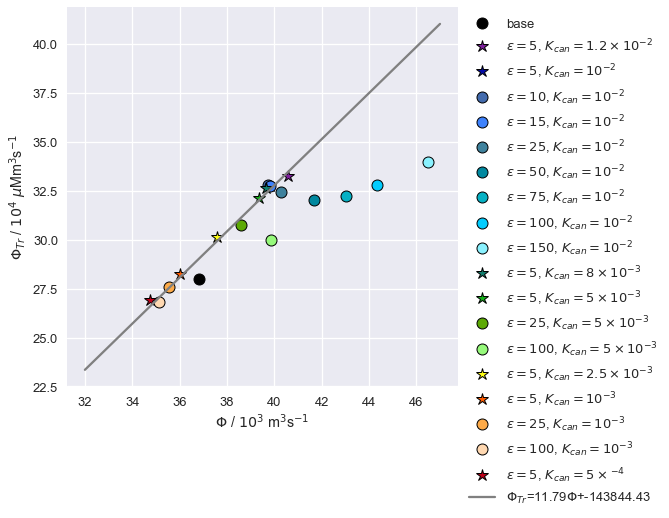

In [17]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

rec0 = records[0] # base case
for rec in records:
    #ax.errorbar(rec.Phi, rec.PhiTr, xerr=rec.Phi_std,yerr=rec.PhiTr_std, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax.plot(rec.Phi/1E3, rec.PhiTr/1E4, rec.mark, markeredgecolor='k',
            markeredgewidth=1, markersize = rec.size, color=sns.xkcd_rgb[rec.color], label=rec.label)
    rec.Phi_inc = 100*((rec.Phi-rec0.Phi)/rec0.Phi) 
    rec.PhiTr_inc = 100*((rec.PhiTr-rec0.PhiTr)/rec0.PhiTr) 
    print(rec.name,rec.Phi_inc,rec.PhiTr_inc)
ax.set_ylabel(r'$\Phi_{Tr}$ / $10^4$ $\mu$Mm$^{3}$s$^{-1}$')
ax.set_xlabel(r'$\Phi$ / $10^3$ m$^{3}$s$^{-1}$')


# Fit line using only step cases (e=5)
Phi_array = np.array([rec.Phi for rec in records_step])
PhiTr_array = np.array([rec.PhiTr for rec in records_step])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Phi_array,PhiTr_array)

ax.plot(np.linspace(32000,47000,100)/1E3,((slope*np.linspace(32000,47000,100))+intercept)/1E4, 
        color='0.5', label = r'$\Phi_{Tr}$=%1.2f$\Phi$+%1.2f' %(slope,intercept))

ax.legend(bbox_to_anchor=(1,1))    


### Plot Kv initial profiles (From IC files)

In [18]:
kv_dir = '/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/'
ini_kv_files = [#kv_dir + 'KrDiff1E_5_1E_2_90zlev_616x360_Quad.bin',
                #kv_dir + 'KrDiff1E_5_5E_3_90zlev_616x360_Quad.bin',
                #kv_dir + 'KrDiff1E_5_1E_3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_exact1p2E2_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_exact_nosmooth_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e10_kv1E2_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e15_kv1E2_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e25_kv1E2_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e50_kv1E2_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e75_kv1E2_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e100_kv1E2_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e150_kv1E2_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_kv8E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_kv5E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e25_kv5E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e100_kv5E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_kv2p5E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_kv1E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e25_kv1E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e100_kv1E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_kv5E4_90zlev_616x360_Quad.bin',
                ]
                
dt = np.dtype('>f8')  # float 64 big endian
DnS = [245, 200] # y, x indices of DnS station

ini_kv_profiles = np.zeros((len(ini_kv_files),nz))

for file, ii in zip(ini_kv_files, range(len(ini_kv_files))):
    data = np.fromfile(file, dt)
    print(file)
    ini_kv = np.reshape(data,(nz,ny,nx),order='C')
    ini_kv_profiles[ii,:] = ini_kv[:, DnS[0], DnS[1]] 

/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e05_exact1p2E2_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e05_exact_nosmooth_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e10_kv1E2_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e15_kv1E2_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e25_kv1E2_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e50_kv1E2_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e75_kv1E2_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e100_kv1E2_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e150_kv1E2_90zlev_61

Text(0.009,15,'Initial $K_v$ profiles')

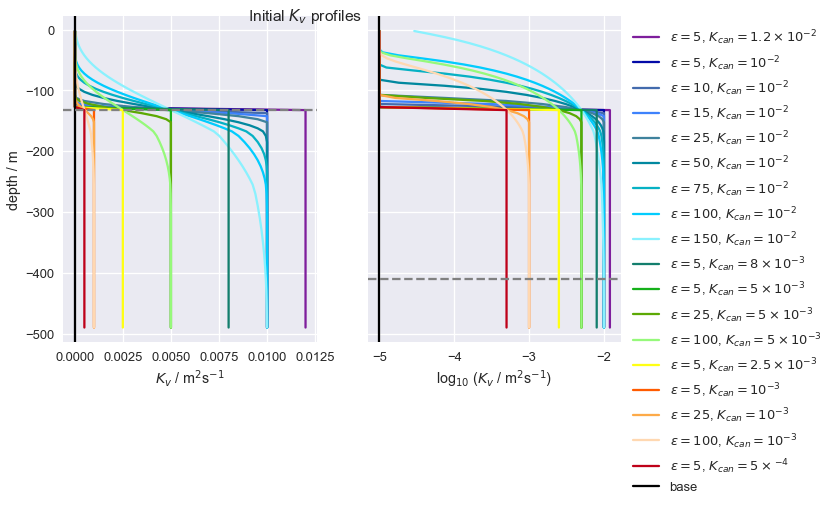

In [19]:
fig,ax = plt.subplots(1, 2,figsize = (10,6), sharey = True )

for ii, rec in zip(range(len(ini_kv_files)), records_nobase):
    ax[0].plot(ini_kv_profiles[ii,:55], Z1[:55],'-', color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[1].plot(np.log10(ini_kv_profiles[ii,:55]), Z1[:55],'-', color=sns.xkcd_rgb[rec.color], label=rec.label)
    rec.kv_rim = ini_kv_profiles[ii,26]
    rec.kv_mean = np.mean(ini_kv_profiles[ii,50])-(-np.mean(ini_kv_profiles[ii,19:26])+np.mean(ini_kv_profiles[ii,26:33]))
    rec.kv_can = np.mean(ini_kv_profiles[ii,50])
 
rec0.kv_rim = 1E-5 
rec0.kv_mean = 1E-5 
rec0.kv_can = 1E-5 
ax[0].axvline(1E-5, color='k', label='base')    
ax[1].axvline(-5, color='k', label='base')    
ax[0].axhline(Z1[26], color = '0.5', linestyle = '--')
ax[1].axhline(Z1[50], color = '0.5', linestyle = '--')
ax[1].legend(bbox_to_anchor=(1,1))
ax[0].set_xlabel('$K_v$ / m$^2$s$^{-1}$')
ax[1].set_xlabel('log$_{10}$ ($K_v$ / m$^2$s$^{-1}$)')
ax[0].set_ylabel('depth / m')
ax[0].text(0.009, 15, r'Initial $K_v$ profiles')

### Find the N, Kv that matters


run 	 	 	 K_can 	  Kv_rim 	 Kv_mean
VISC3D_REALISTIC_run24, 1.20e-02, 1.20e-02, 1.00e-05
VISC3D_REALISTIC_run27, 1.00e-02, 1.00e-02, 1.00e-05
VISC3D_REALISTIC_run07, 1.00e-02, 5.00e-03, 8.53e-04
VISC3D_REALISTIC_run11, 1.00e-02, 5.00e-03, 1.32e-03
VISC3D_REALISTIC_run08, 1.00e-02, 5.00e-03, 2.17e-03
VISC3D_REALISTIC_run09, 1.00e-02, 5.00e-03, 4.23e-03
VISC3D_REALISTIC_run12, 1.00e-02, 5.00e-03, 5.73e-03
VISC3D_REALISTIC_run10, 1.00e-02, 5.00e-03, 6.68e-03
VISC3D_REALISTIC_run13, 9.94e-03, 5.00e-03, 7.66e-03
VISC3D_REALISTIC_run23, 8.00e-03, 8.00e-03, 1.00e-05
VISC3D_REALISTIC_run17, 5.00e-03, 5.00e-03, 1.00e-05
VISC3D_REALISTIC_run21, 5.00e-03, 2.51e-03, 1.09e-03
VISC3D_REALISTIC_run22, 5.00e-03, 2.51e-03, 3.34e-03
VISC3D_REALISTIC_run25, 2.50e-03, 2.50e-03, 1.00e-05
VISC3D_REALISTIC_run16, 1.00e-03, 1.00e-03, 1.00e-05
VISC3D_REALISTIC_run19, 1.00e-03, 5.05e-04, 2.24e-04
VISC3D_REALISTIC_run20, 1.00e-03, 5.05e-04, 6.71e-04
VISC3D_REALISTIC_run26, 5.00e-04, 5.00e-04, 1.00e-05


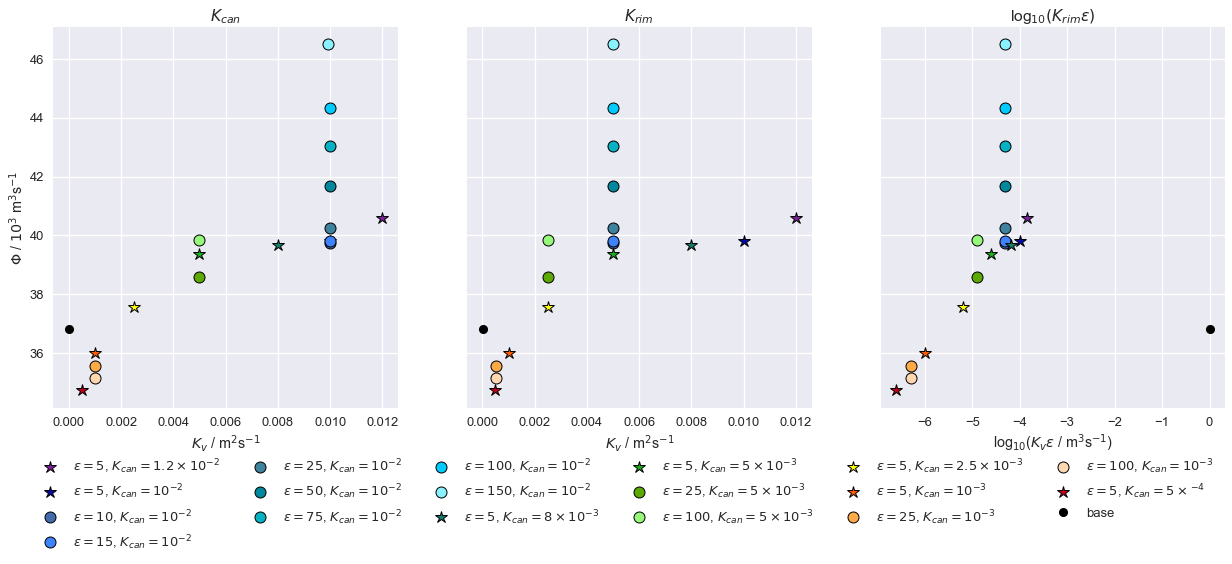

In [20]:
sns.set_style('darkgrid')
sns.set_style('darkgrid')
fig, [ax1, ax2, ax3] = plt.subplots(1,3,figsize=(21,7), sharey = True)

print('run \t \t \t K_can \t  Kv_rim \t Kv_mean')
rec0 = records[0] # base case
rec0.kv_rim = 1E-5

for rec in records[1:]:
    ax1.plot(rec.kv_can,(rec.Phi/1000),rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    ax2.plot(rec.kv_rim,(rec.Phi/1000),rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    ax3.plot(np.log10(rec.kv_rim*rec.kv_can),(rec.Phi/1000),rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    
    print('%s, %1.2e, %1.2e, %1.2e' %(rec.name, rec.kv_can, rec.kv_rim, rec.kv_mean))

ax1.plot(rec0.kv_can,(rec0.Phi/1000),'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)
ax2.plot(rec0.kv_can,(rec0.Phi/1000),'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)
ax3.plot(rec0.kv_can,(rec0.Phi/1000),'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)

ax1.set_ylabel(r'$\Phi$ / $10^3$ m$^{3}$s$^{-1}$')
ax1.set_xlabel(r'$K_{v}$ / m$^2$s$^{-1}$')
ax1.set_title('$K_{can}$')

ax2.set_xlabel(r'$K_{v}$ / m$^2$s$^{-1}$')
ax2.set_title('$K_{rim}$')

ax3.set_xlabel(r'log$_{10}$($K_{v}\epsilon$ / m$^3$s$^{-1}$)')
ax3.set_title('log$_{10}(K_{rim} \epsilon)$')

ax1.legend(bbox_to_anchor=(3.4,-0.1), ncol=6)    


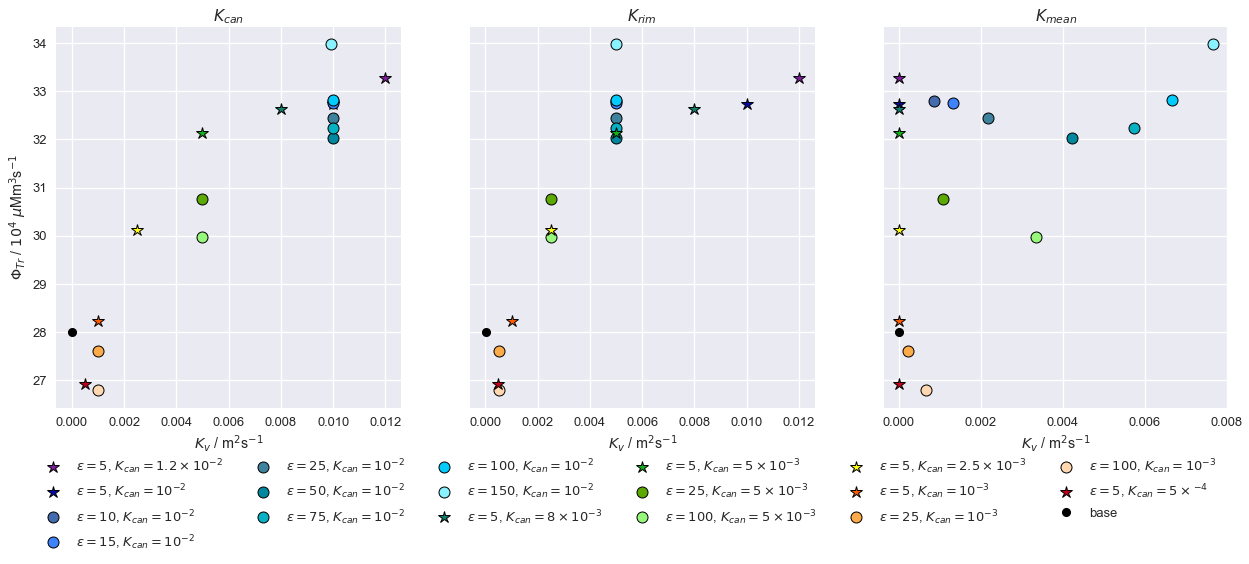

In [49]:
sns.set_style('darkgrid')
sns.set_style('darkgrid')
fig, [ax1, ax2, ax3] = plt.subplots(1,3,figsize=(21,7), sharey = True)
rec0 = records[0] # base case
rec0.kv_rim = 1E-5

for rec in records[1:]:
    ax1.plot(rec.kv_can,(rec.PhiTr/10000),rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    ax2.plot(rec.kv_rim,(rec.PhiTr/10000),rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    ax3.plot(rec.kv_mean,(rec.PhiTr/10000),rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)

ax1.plot(rec0.kv_can,(rec0.PhiTr/10000),'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)
ax2.plot(rec0.kv_can,(rec0.PhiTr/10000),'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)
ax3.plot(rec0.kv_can,(rec0.PhiTr/10000),'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)

ax1.set_ylabel(r'$\Phi_{Tr}$ / $10^4$ $\mu$Mm$^{3}$s$^{-1}$')
ax1.set_xlabel(r'$K_{v}$ / m$^2$s$^{-1}$')
ax1.set_title('$K_{can}$')

ax2.set_xlabel(r'$K_{v}$ / m$^2$s$^{-1}$')
ax2.set_title('$K_{rim}$')

ax3.set_xlabel(r'$K_{v}$ / m$^2$s$^{-1}$')
ax3.set_title('$K_{mean}$')

ax1.legend(bbox_to_anchor=(3.4,-0.1), ncol=6)    


run 	 	 	 N_above 	  N_below 	 N_mean
VISC3D_REALISTIC_run24, 38.29, -63.01, -64.36
VISC3D_REALISTIC_run27, 33.76, -60.03, -61.27
VISC3D_REALISTIC_run07, 22.67, -55.14, -56.78
VISC3D_REALISTIC_run11, 18.66, -51.10, -53.82
VISC3D_REALISTIC_run08, 2.45, -43.77, -46.68
VISC3D_REALISTIC_run09, -23.03, -34.32, -36.93
VISC3D_REALISTIC_run12, -27.15, -29.90, -33.13
VISC3D_REALISTIC_run10, -27.07, -27.51, -31.24
VISC3D_REALISTIC_run13, -26.72, -25.34, -29.68
VISC3D_REALISTIC_run23, 28.63, -57.17, -58.27
VISC3D_REALISTIC_run17, 22.05, -49.60, -52.00
VISC3D_REALISTIC_run21, -6.75, -34.82, -38.26
VISC3D_REALISTIC_run22, -20.77, -21.37, -25.15
VISC3D_REALISTIC_run25, 18.79, -40.23, -41.96
VISC3D_REALISTIC_run16, 9.30, -22.16, -26.52
VISC3D_REALISTIC_run19, -9.29, -17.54, -19.74
VISC3D_REALISTIC_run20, -9.53, -10.41, -12.57
VISC3D_REALISTIC_run26, 2.16, -12.70, -16.70


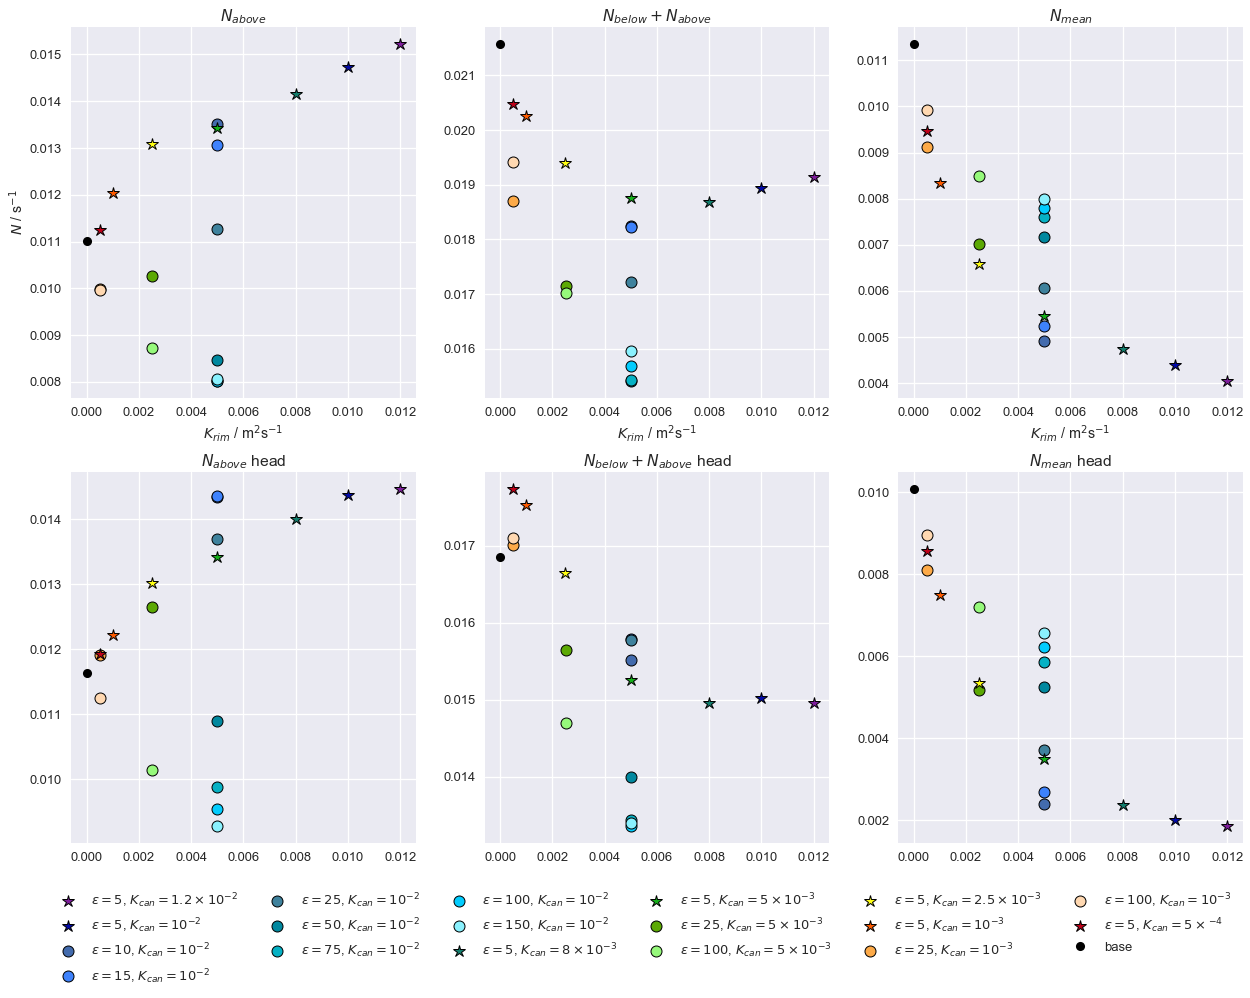

In [89]:
sns.set_style('darkgrid')
sns.set_style('darkgrid')
fig, [(ax1, ax2, ax3),(ax4,ax5,ax6)] = plt.subplots(2,3,figsize=(21,15))

print('run \t \t \t N_above \t  N_below \t N_mean')

for rec in records[1:]:
    ax3.plot(rec.kv_rim,rec.Nmean,rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    ax1.plot(rec.kv_rim,rec.Nab,rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    ax2.plot(rec.kv_rim,rec.Nbe+rec.Nab,rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    ax6.plot(rec.kv_rim,rec.Nmean_h,rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    ax4.plot(rec.kv_rim,rec.Nab_h,rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    ax5.plot(rec.kv_rim,rec.Nbe_h+rec.Nab_h,rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    print('%s, %1.2f, %1.2f, %1.2f' %(rec.name, 100*(rec.Nab-rec0.Nab)/rec0.Nab, 
                                      100*(rec.Nbe-rec0.Nbe)/rec0.Nbe, 
                                      100*(rec.Nmean-rec0.Nmean)/rec0.Nmean))
ax3.plot(rec0.kv_rim,rec0.Nmean,'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)
ax1.plot(rec0.kv_rim,rec0.Nab,'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)
ax2.plot(rec0.kv_rim,rec0.Nbe+rec0.Nab,'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)

ax6.plot(rec0.kv_rim,rec0.Nmean_h,'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)
ax4.plot(rec0.kv_rim,rec0.Nab_h,'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)
ax5.plot(rec0.kv_rim,rec0.Nbe_h+rec0.Nab_h,'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)


ax1.set_ylabel(r'$N$ / s$^{-1}$')
ax1.set_xlabel(r'$K_{rim}$ / m$^2$s$^{-1}$')
ax3.set_title('$N_{mean}$')
ax6.set_title('$N_{mean}$ head')

ax2.set_xlabel(r'$K_{rim}$ / m$^2$s$^{-1}$')
ax1.set_title('$N_{above}$')
ax4.set_title('$N_{above}$ head')

ax3.set_xlabel(r'$K_{rim}$ / m$^2$s$^{-1}$')
ax2.set_title('$N_{below}+N_{above}$')
ax5.set_title('$N_{below}+N_{above}$ head')

ax4.legend(bbox_to_anchor=(3.4,-0.1), ncol=6)    


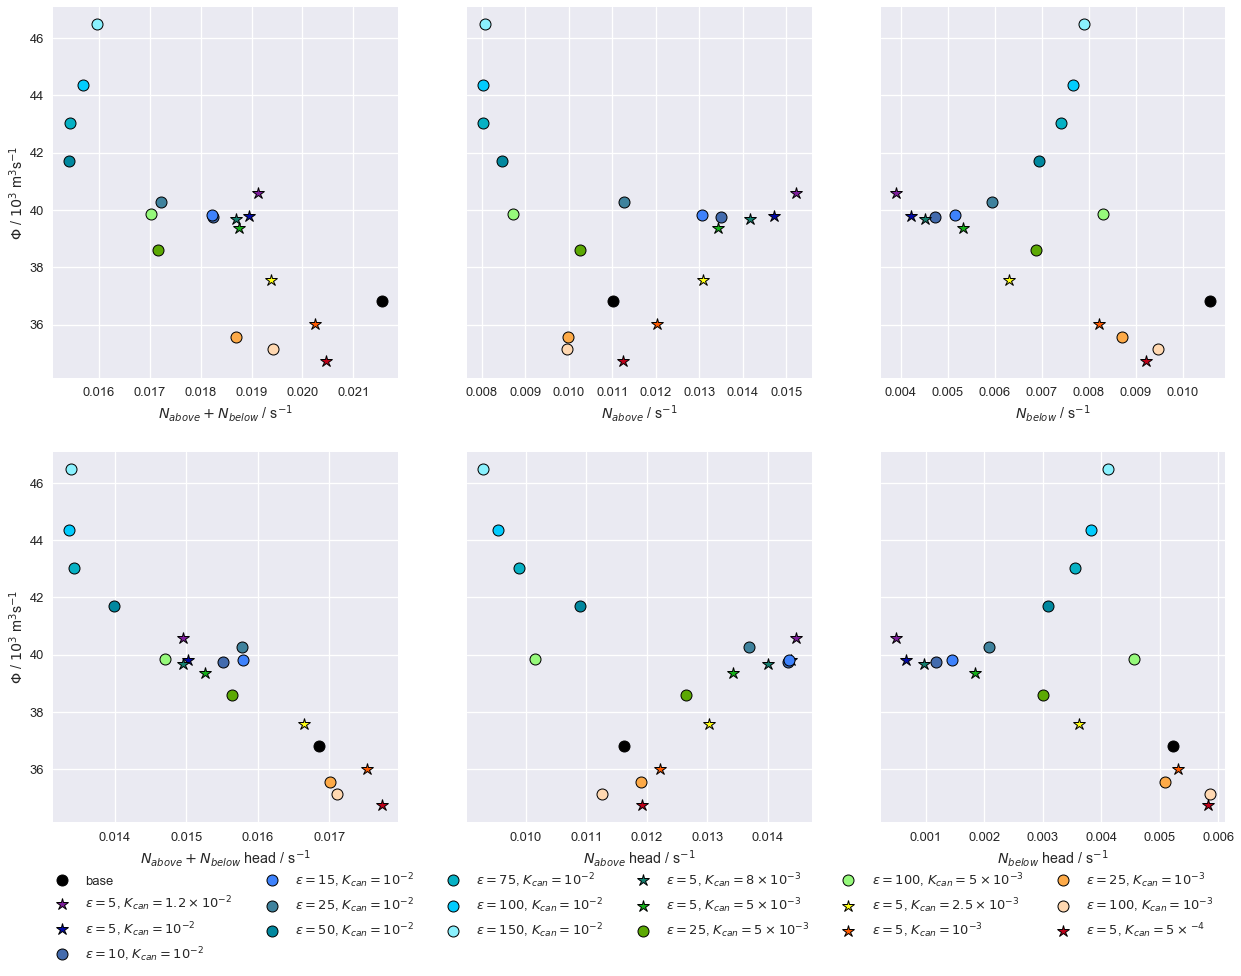

In [91]:
sns.set_style('darkgrid')

fig, [(ax1, ax2, ax3),(ax4, ax5, ax6)] = plt.subplots(2,3,figsize=(21,15), sharey=True)

for rec in records:
    ax1.plot(rec.Nab+rec.Nbe,rec.Phi/1E3, rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    ax2.plot(rec.Nab,rec.Phi/1E3,rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    ax3.plot(rec.Nbe,rec.Phi/1E3,rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    
    ax4.plot(rec.Nab_h+rec.Nbe_h,rec.Phi/1E3, rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    ax5.plot(rec.Nab_h,rec.Phi/1E3,rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)
    ax6.plot(rec.Nbe_h,rec.Phi/1E3,rec.mark, markersize=rec.size, markeredgewidth=1,
            markeredgecolor='k',color=sns.xkcd_rgb[rec.color],
            label=rec.label)

ax1.set_xlabel(r'$N_{above}+N_{below}$ / s$^{-1}$')
ax2.set_xlabel(r'$N_{above}$ / s$^{-1}$')
ax3.set_xlabel(r'$N_{below}$ / s$^{-1}$')

ax4.set_xlabel(r'$N_{above}+N_{below}$ head / s$^{-1}$')
ax5.set_xlabel(r'$N_{above}$ head / s$^{-1}$')
ax6.set_xlabel(r'$N_{below}$ head / s$^{-1}$')

ax1.set_ylabel(r'$\Phi$ / $10^3$ m$^{3}$s$^{-1}$')
ax4.set_ylabel(r'$\Phi$ / $10^3$ m$^{3}$s$^{-1}$')

ax4.legend(bbox_to_anchor=(3.4,-0.1), ncol=6)    


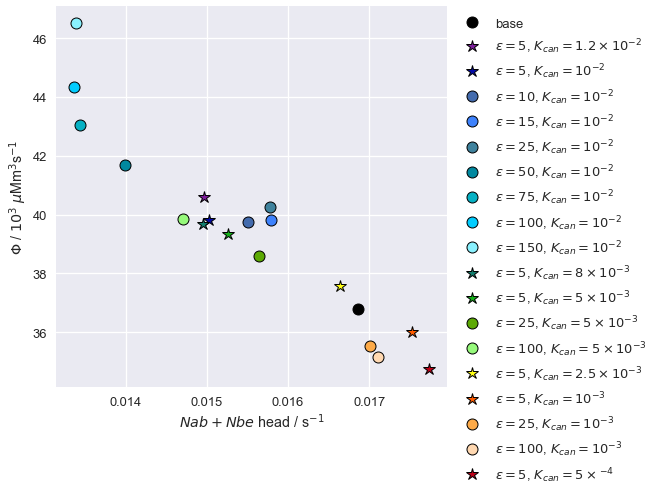

In [92]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

for rec in records[:]:
    ax.plot(rec.Nab_h+rec.Nbe_h,rec.Phi/1E3,rec.mark, markeredgecolor='k', 
            markeredgewidth=1, markersize=rec.size,color=sns.xkcd_rgb[rec.color], 
            label=rec.label)
ax.set_ylabel(r'$\Phi$ / $10^3$ $\mu$Mm$^{3}$s$^{-1}$')
ax.set_xlabel(r'$Nab+Nbe$ head / s$^{-1}$')


ax.legend(bbox_to_anchor=(1,1))    


(0, 0.014)

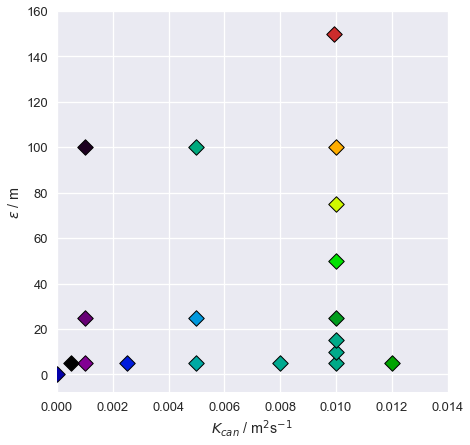

In [93]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

for rec in records[:]:
    ax.scatter(rec.kv_can,rec.epsilon,c = (rec.Phi/1E4), vmin=3.5, vmax = 4.7,
               cmap='nipy_spectral', marker='D', s=120, linewidths = 1, edgecolors='k')
    

ax.set_xlabel(r'$K_{can}$ / m$^{2}$s$^{-1}$')
ax.set_ylabel(r'$\epsilon$ / m')
ax.set_xlim(0,0.014)


(0, 0.014)

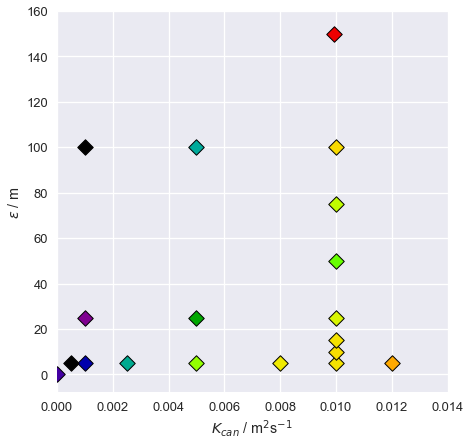

In [94]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

for rec in records[:]:
    ax.scatter(rec.kv_can,rec.epsilon,c = (rec.PhiTr/1E5), vmin=2.7, vmax = 3.5,
               cmap='nipy_spectral', marker='D', s=120, linewidths = 1, edgecolors='k' )

ax.set_xlabel(r'$K_{can}$ / m$^{2}$s$^{-1}$')
ax.set_ylabel(r'$\epsilon$ / m')
ax.set_xlim(0,0.014)